In [1]:
from sklearn.model_selection import learning_curve
from sklearn import linear_model
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as seabornInstance 
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from scipy.special import expit
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot as skplt
import pandas as pd
import numpy as np

In [2]:
# Loading in data
data = pd.read_csv("inputsong3.csv")

# Delete non-number columns
data = data.drop(['Artist'], axis=1)
data = data.drop(['Album'], axis=1)
data = data.drop(['Track ID'], axis=1)
data = data.drop(['Track'], axis=1)

In [3]:
# Mapping Keys to numbers
key_di = {0: "C",0: "B#", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 5: "E#", 6: "F#", 
          7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}
data.replace({"Key": key_di})
data = data.drop(['Key'], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,1976,5,0.628,0.407,10,-12.304,1,0.0289,0.93500,0.091300,0.5340,0.699,105.554,4
1,1987,6,0.507,0.962,9,-7.710,1,0.0568,0.01460,0.000004,0.0963,0.512,94.583,4
2,2014,0,0.596,0.277,9,-17.824,1,0.0534,0.14000,0.944000,0.1260,0.459,202.041,4
3,1999,18,0.318,0.435,2,-7.558,1,0.0298,0.70400,0.000001,0.1320,0.388,156.135,3
4,2015,36,0.535,0.934,5,-3.965,0,0.0425,0.00315,0.003800,0.1360,0.201,128.033,4


In [4]:
data["Popularity"].astype(str).astype(int)
data['Popularity_bucket']=data.Popularity.map(lambda x: x/10).apply(np.floor).astype(int)
data.head(10)

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Popularity_bucket
0,1976,5,0.628,0.407,10,-12.304,1,0.0289,0.93500,0.091300,0.5340,0.6990,105.554,4,0
1,1987,6,0.507,0.962,9,-7.710,1,0.0568,0.01460,0.000004,0.0963,0.5120,94.583,4,0
2,2014,0,0.596,0.277,9,-17.824,1,0.0534,0.14000,0.944000,0.1260,0.4590,202.041,4,0
3,1999,18,0.318,0.435,2,-7.558,1,0.0298,0.70400,0.000001,0.1320,0.3880,156.135,3,1
4,2015,36,0.535,0.934,5,-3.965,0,0.0425,0.00315,0.003800,0.1360,0.2010,128.033,4,3
5,1988,16,0.304,0.145,9,-18.795,1,0.0363,0.73500,0.000003,0.2300,0.0708,157.317,3,1
6,1973,29,0.814,0.299,6,-17.286,0,0.0485,0.14600,0.000284,0.1140,0.6280,115.331,4,2
7,2018,14,0.744,0.434,0,-12.655,1,0.0324,0.23600,0.000000,0.1790,0.7390,105.820,4,1
8,2018,69,0.760,0.579,0,-7.374,1,0.0569,0.01290,0.003510,0.1060,0.1250,100.010,4,6
9,1982,22,0.585,0.210,7,-15.799,1,0.0321,0.45900,0.000048,0.1100,0.2480,61.896,4,2


In [5]:
# Split training, testing, validation data by 80%, 10%, 10%
train_data,test_data = np.split(data.sample(frac=1), [int(.95*len(data))])

In [6]:
# Split output and convert to array
train_output = train_data.Popularity
train_output = np.asarray(train_output,dtype=np.float64)
train_output_norm = train_data.Popularity
train_output_norm = np.asarray(train_output_norm,dtype=np.float64)
train_data = train_data.drop(['Popularity'], axis=1)
train_data_norm = train_data
train_data = np.asarray(train_data,dtype=np.float64)
train_data_norm = np.asarray(train_data,dtype=np.float64)
training_count = len(train_data[:,0])
training_count_norm = len(train_data[:,0])

test_output = test_data.Popularity
test_output = np.asarray(test_output,dtype=np.float64)
test_output_norm = test_data.Popularity
test_output_norm = np.asarray(test_output_norm,dtype=np.float64)
test_data = test_data.drop(['Popularity'], axis=1)
test_data_norm = test_data
test_data = np.asarray(test_data,dtype=np.float64)
test_data_norm = np.asarray(test_data,dtype=np.float64)
test_count = len(test_data[:,0])
test_count_norm = len(test_data[:,0])

#valid_output = valid_data.Popularity
#valid_output = np.asarray(valid_output,dtype=np.float64)
#valid_output_norm = valid_data.Popularity
#valid_output_norm = np.asarray(valid_output_norm,dtype=np.float64)
#valid_data = valid_data.drop(['Popularity'], axis=1)
#valid_data_norm = valid_data
#valid_data = np.asarray(valid_data,dtype=np.float64)
#valid_data_norm = np.asarray(valid_data,dtype=np.float64)
#valid_count = len(valid_data[:,0])
#valid_count_norm = len(valid_data[:,0])

In [20]:
print(training_count)
print(test_count)
#print(valid_count)

57991
3053


In [21]:
# normalized the dataset
min_max_scaler = preprocessing.MinMaxScaler()

train_data_norm = min_max_scaler.fit_transform(train_data_norm)

test_data_norm = min_max_scaler.fit_transform(test_data_norm)

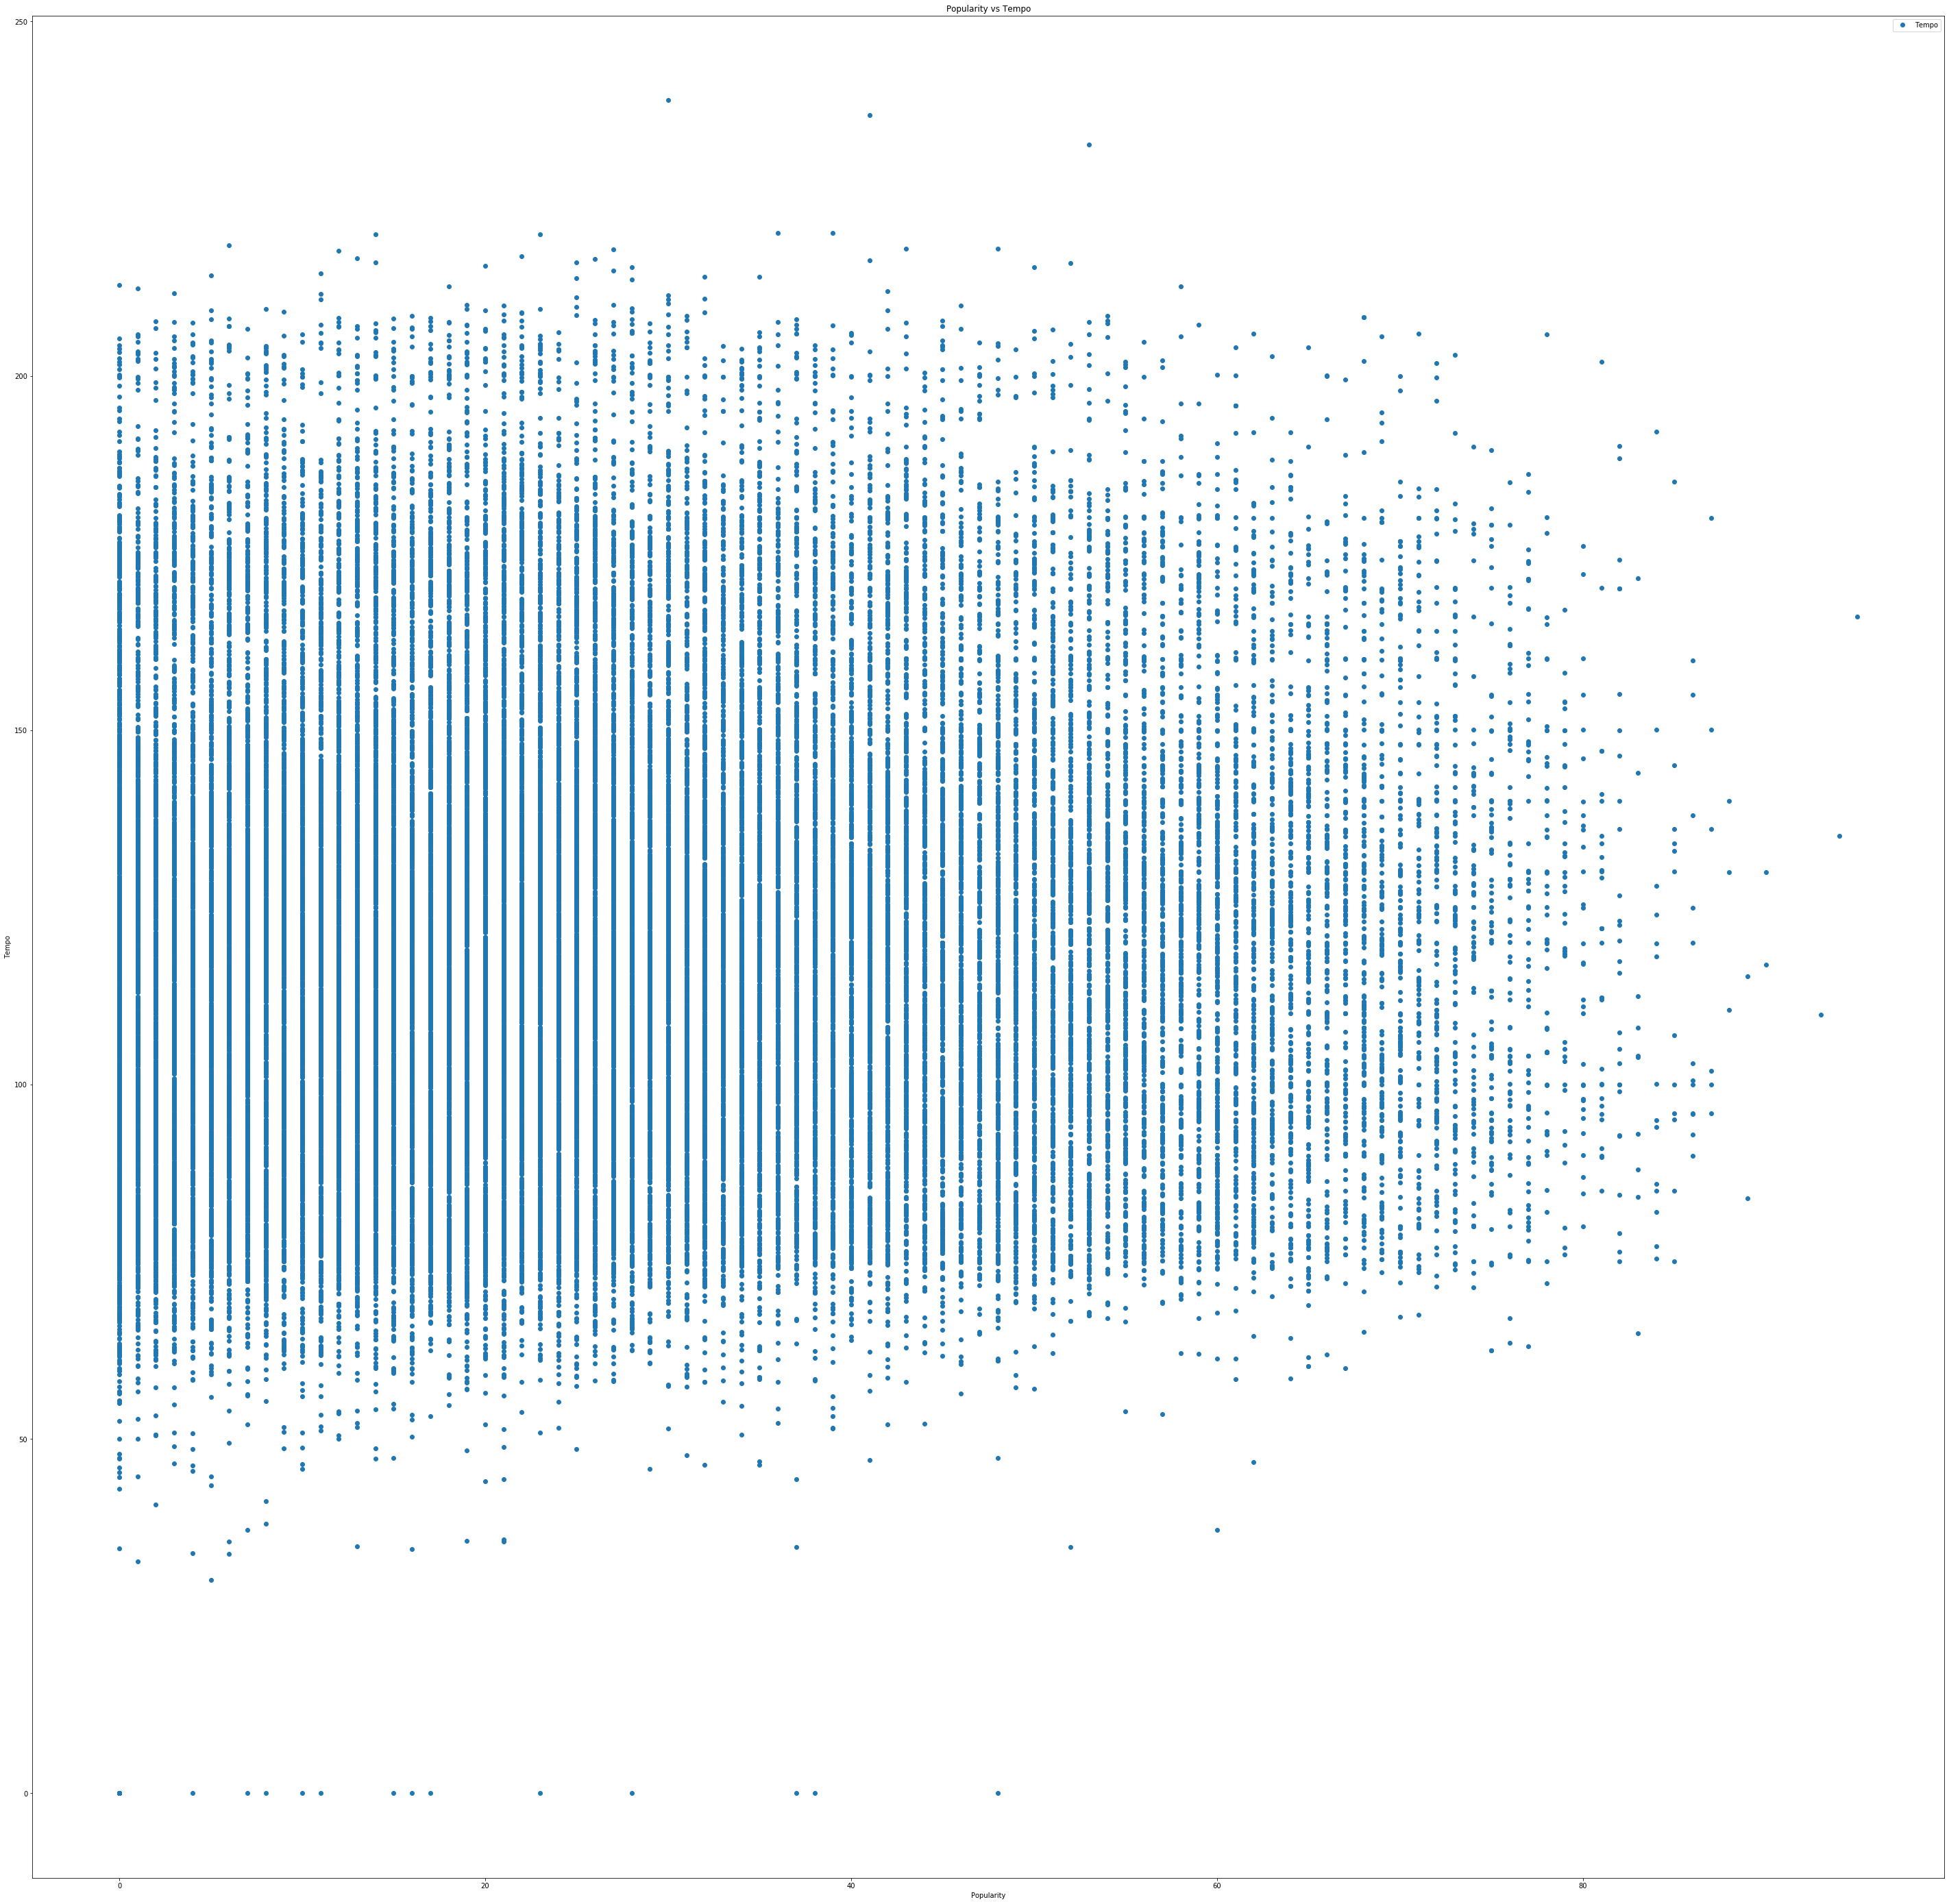

In [8]:
data.plot(x='Popularity', y='Tempo', style='o',figsize=(50,50))  
plt.title('Popularity vs Tempo')  
plt.xlabel('Popularity')  
plt.ylabel('Tempo')  
plt.show()

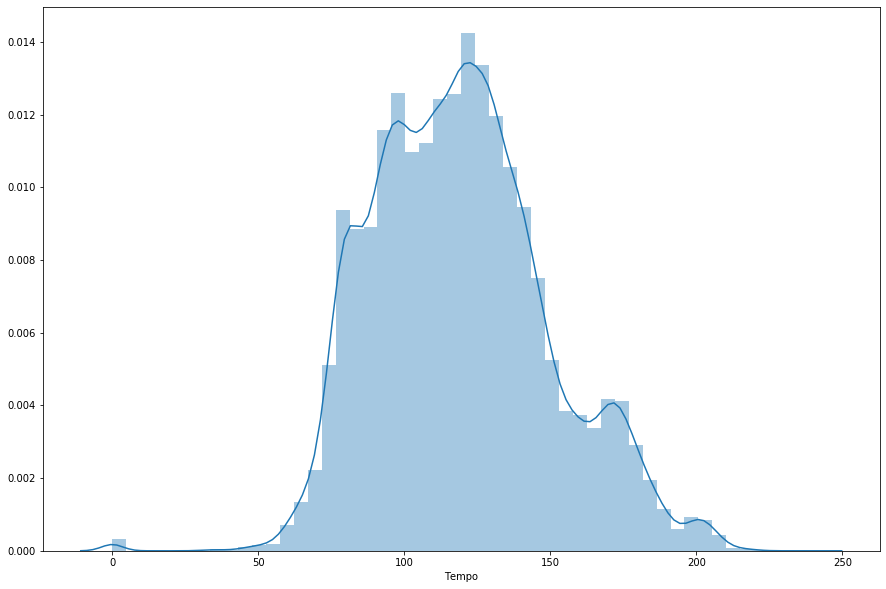

In [33]:
plt.figure(figsize=(15,10))
plt.tight_layout()
df4 = data.loc[data['Popularity']<50]
seabornInstance.distplot(df4['Tempo'])

In [34]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
Release Date,1.000000,0.103879,0.061599,0.238364,0.019590,0.281013,-0.071993,0.107718,-0.251424,-0.004511,0.047575,-0.150728,0.039780,0.041083
Popularity,0.103879,1.000000,0.128969,0.188155,0.017711,0.254367,-0.037723,0.019629,-0.241023,-0.125064,-0.093561,-0.001977,0.055279,0.073658
Danceability,0.061599,0.128969,1.000000,0.109223,0.020462,0.137508,-0.037620,0.126564,-0.169025,-0.169604,-0.182748,0.537857,-0.083668,0.190941
Energy,0.238364,0.188155,0.109223,1.000000,0.031102,0.783370,-0.072778,0.113236,-0.732720,-0.089406,0.195434,0.294942,0.244582,0.193918
Key Val,0.019590,0.017711,0.020462,0.031102,1.000000,0.016093,-0.141655,0.026820,-0.030580,-0.005572,-0.004814,0.019748,0.000942,0.003033
Loudness,0.281013,0.254367,0.137508,0.783370,0.016093,1.000000,-0.040539,-0.001510,-0.577576,-0.224861,0.074583,0.188688,0.193768,0.168116
Mode,-0.071993,-0.037723,-0.037620,-0.072778,-0.141655,-0.040539,1.000000,-0.070894,0.079621,-0.049458,0.002233,0.032832,0.004728,-0.016991
Speechiness,0.107718,0.019629,0.126564,0.113236,0.026820,-0.001510,-0.070894,1.000000,-0.030448,-0.081231,0.185219,0.006461,0.013067,-0.009179
Acousticness,-0.251424,-0.241023,-0.169025,-0.732720,-0.030580,-0.577576,0.079621,-0.030448,1.000000,0.094214,-0.057764,-0.188428,-0.203425,-0.174538
Instrumentalness,-0.004511,-0.125064,-0.169604,-0.089406,-0.005572,-0.224861,-0.049458,-0.081231,0.094214,1.000000,-0.018476,-0.147866,-0.026981,-0.028515


In [28]:
reg = LinearRegression().fit(train_data,train_output)
reg_norm = LinearRegression().fit(train_data_norm,train_output)

In [29]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
print(reg.score(test_data,test_output))
print(reg_norm.score(test_data_norm,test_output))

0.10830058351971272
0.09968811197947647


In [30]:
# Make predictions using the testing set
test_data_pred = reg.predict(test_data)

In [31]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_output, test_data_pred))

print('Root Mean Squared Error:', np.sqrt(np.mean((reg.predict(test_data) - test_output)**2)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_output, test_data_pred))


Coefficients: 
 [-1.04024964e-02  1.31206681e+01 -4.72051979e+00  6.14918241e-02
  7.82433855e-01 -6.63268198e-01  3.34652397e+00 -9.29891430e+00
 -4.91650211e+00 -7.84228129e+00 -1.01431472e+01  1.59800975e-02
  7.63568697e-01]
Mean squared error: 296.57
Root Mean Squared Error: 17.221328296072677
Coefficient of determination: 0.11


In [40]:
df_res = pd.DataFrame({'Actual': test_output.flatten(), 'Predicted': test_data_pred.flatten()})
df_res

,Actual,Predicted
0,35.0,37.067679
1,51.0,35.569085
2,26.0,27.515822
3,43.0,32.457792
4,8.0,33.099987
...,...,...
12204,18.0,30.524521
12205,8.0,24.109970
12206,61.0,37.251573
12207,12.0,24.679578


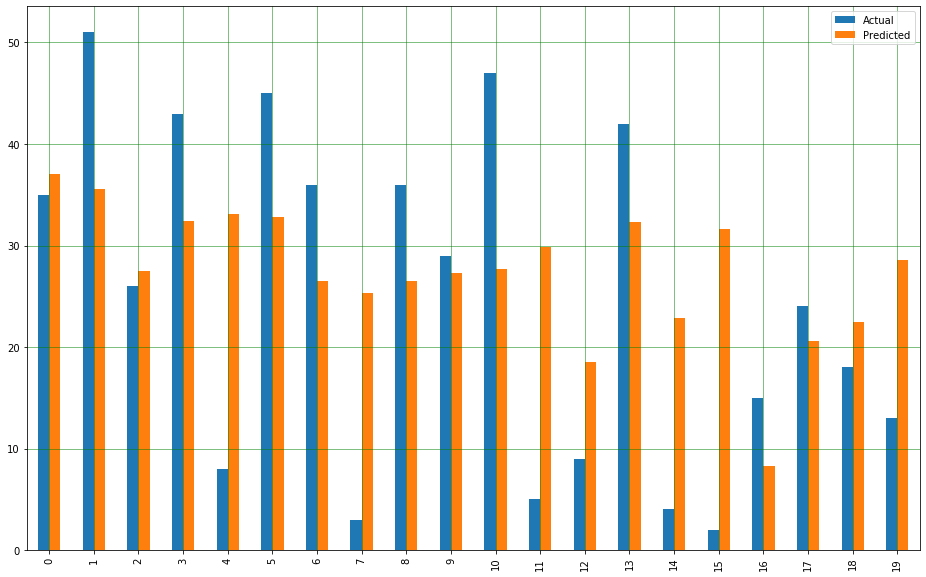

In [42]:
df1 = df_res.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [23]:
# Another penalization approach, called Lasso (least absolute shrinkage and selection operator), 
# can set some coefficients to zero. 
# Such methods are called sparse method and sparsity can be seen as an application of Occam’s razor: 
# prefer simpler models.

alphas = np.logspace(-4, -1, 6)
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
          .fit(train_data, train_output)
          .score(test_data, test_output) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
y_pred = regr.fit(test_data, test_output)
print(regr.coef_)
print(best_alpha)
print('Mean Squared Error:', np.mean((regr.predict(test_data) - test_output)**2))  
print('Root Mean Squared Error:', np.sqrt(np.mean((regr.predict(test_data) - test_output)**2)))
print('Coefficient of determination: %.2f'% r2_score(test_output, regr.predict(test_data)))

[-8.22407648e-03  1.39690789e+01 -2.17697763e+00 -2.79126317e-02
  6.99288195e-01  5.55693787e-02  2.29058514e+00 -7.72360215e+00
 -4.99932334e+00 -7.00619016e+00 -9.98572513e+00  1.38692769e-02
  6.97377282e-01]
0.00630957344480193
Mean Squared Error: 296.1520466459152
Root Mean Squared Error: 17.209068732674503
Coefficient of determination: 0.11


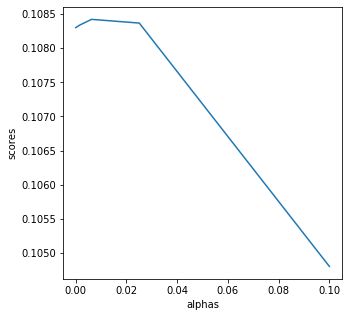

In [26]:
plt.figure(figsize=(5,5))
plt.xlabel('alphas')
plt.ylabel('scores')
plt.plot(alphas,scores) 

In [27]:
regr = linear_model.Ridge(alpha=.1)
regr.fit(train_data, train_output)
print('Mean Squared Error:', np.mean((regr.predict(test_data) - test_output)**2))  
print('Root Mean Squared Error:', np.sqrt(np.mean((regr.predict(test_data) - test_output)**2)))
print('Coefficient of determination: %.2f'% r2_score(test_output, regr.predict(test_data)))

Mean Squared Error: 296.5740852607622
Root Mean Squared Error: 17.22132646635451
Coefficient of determination: 0.11


In [35]:
regressions = {'Methods': ['Linear Regression','Lasso','Ridge'],
        'MSE': [296.57,296.15,296.5740852607622],
        'Root-MSE': [17.221328296072677,17.209068732674503,17.22132646635451],
        'Coefficient of determination': [0.11,0.11,0.11]}

df = pd.DataFrame(regressions, 
                  columns = ['Methods', 'MSE','Root-MSE','Coefficient of determination'])
print (df)

             Methods         MSE   Root-MSE  Coefficient of determination
0  Linear Regression  296.570000  17.221328                          0.11
1              Lasso  296.150000  17.209069                          0.11
2              Ridge  296.574085  17.221326                          0.11


In [11]:
regr = MLPRegressor(random_state=1, max_iter=500,hidden_layer_sizes=(13,8, )).fit(train_data, train_output)

In [12]:
regr.predict(train_data[:2])

array([20.54001373, 31.54054949])

In [13]:
regr.score(test_data, test_output)

0.10403915343585601

In [16]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

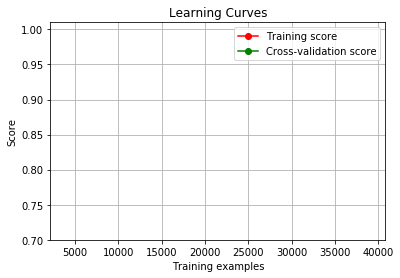

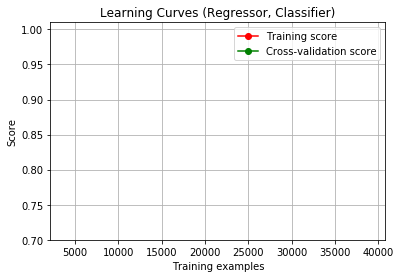

In [21]:
digits = load_digits()
X, y = train_data, train_output


title = "Learning Curves(Regressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MLPRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Regressor, Classifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = MLPClassifier()
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [29]:
pd.DataFrame(regr.loss_curve_).plot()
pd.DataFrame(regr.validation_curve_).plot()

AttributeError: 'MLPRegressor' object has no attribute 'loss_curve_'

	Model parameters:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Mean squared error: 325.91
Root mean squared error: 18.05
R-squared score: -0.00
	Model parameters:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol'

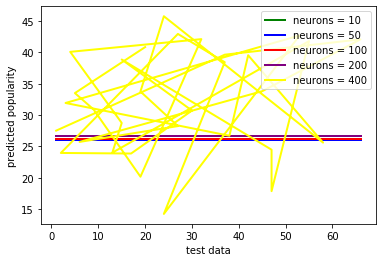

In [42]:
colors = ['green', 'blue', 'red', 'purple', 'yellow']
for i, neuron in enumerate([10, 50, 100, 200, 400]):
        regr = MLPRegressor(hidden_layer_sizes=(neuron,), max_iter=200, alpha=1e-4,
                            solver='adam', tol=1e-4, random_state=1,learning_rate_init=.1)
        # Train the model using the training sets
        regr.fit(train_data, train_output)
        
        # Make predictions using the testing set
        second_half_y_pred = regr.predict(test_data)
        print("\tModel parameters: ", regr.get_params(deep=False))
        
        # mean squared error
        mse = mean_squared_error(test_output, second_half_y_pred)
        rmse = np.sqrt(mse)
        print("Mean squared error: %.2f" % mse)
        print("Root mean squared error: %.2f" % rmse)
        # Explained variance score: 1 is perfect prediction
        print('R-squared score: %.2f' % r2_score(test_output, second_half_y_pred))
        
        plt.plot(test_output, second_half_y_pred, linewidth=2, color=colors[i],
                 label="neurons = %s" % str(neuron))

#plt.scatter(train_data, train_output, color='green', label = "training set")
#plt.scatter(test_data, test_output, color='red', label = "testing set")
plt.xlabel ("test data")
plt.ylabel ("predicted popularity")
plt.legend(loc='upper right')
plt.show()

/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


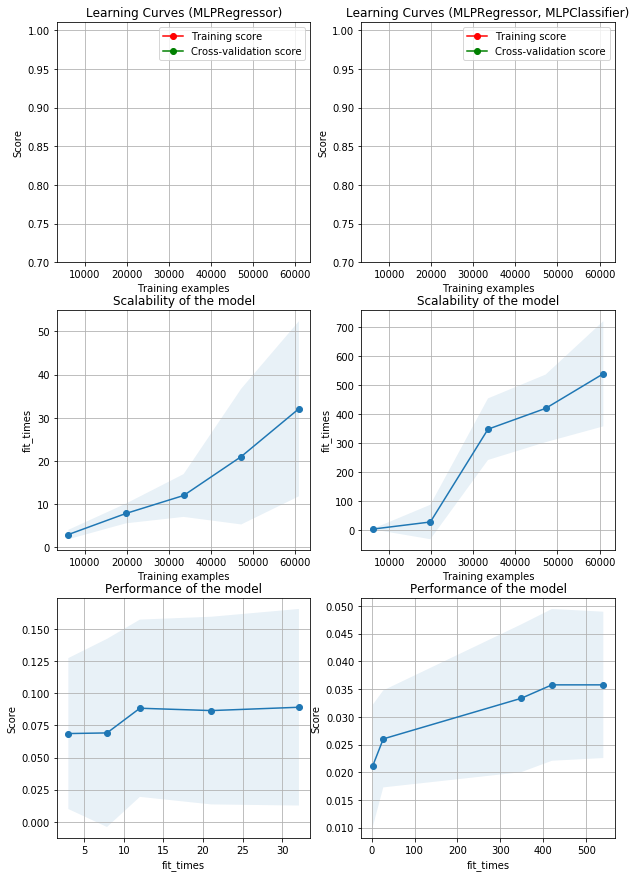

In [7]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, train_data, train_output, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (MLPRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.002, random_state=0)

estimator = MLPRegressor()
plot_learning_curve(estimator, title, train_data, train_output, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (MLPRegressor, MLPClassifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.002, random_state=0)
estimator = MLPClassifier()
plot_learning_curve(estimator, title, train_data, train_output, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [16]:
param_range = np.linspace(1, 200, num=10)
train_scores, valid_scores = validation_curve(MLPRegressor(), train_data, train_output,
                                               cv=10,scoring='accuracy',param_name='max_iter',param_range=param_range)

/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/lin_peihsuan

/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/lin_peihsuan

/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/lin_peihsuan

In [ ]:
train_scores = pd.DataFrame(train_scores)
#print(train_scores)
train_scores = train_scores.mean(axis = 0, skipna = True)
#print(train_scores)
pd.DataFrame(train_scores).plot()

In [ ]:
valid_scores = pd.DataFrame(valid_scores)
#print(valid_scores)
valid_scores = valid_scores.mean(axis = 0, skipna = True)
#print(valid_scores)
pd.DataFrame(valid_scores).plot()

In [ ]:
plt.plot(train_scores)
plt.plot(valid_scores)
plt.xlabel("epochs")
plt.ylabel("scores(accuracy)")
plt.legend(['train_scores','valid_scores'])

In [ ]:
def plot_learning_curve(estimator, title, X_train, y_train, X_valid, y_valid cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=cv,
                                                            train_sizes=train_sizes)
    train_scoresv, valid_scores = validation_curve(estimator, X_valid, y_valid,
                                               cv=cv,scoring='neg_mean_squared_error',
                                                  param_name='max_iter',param_range=range(50,200))
    
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    plt.grid() # 设置背景的网格

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std,
                     alpha=0.1, color='b')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='b',
             label='validation score') # 绘制测试精度曲线
    plt.legend(loc='best')
    return plt

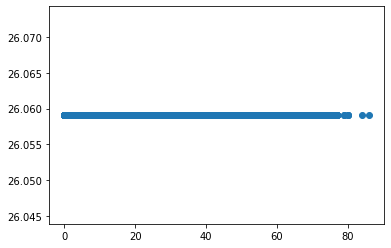

In [22]:
regr = MLPRegressor(hidden_layer_sizes=(13,8, ), activation='logistic', solver='sgd', alpha=0.0001, 
                    batch_size='auto', learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, 
                    max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                    momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.2, 
                    epsilon=1e-08, n_iter_no_change=10)

regr.fit(train_data,train_output)
predicted = regr.predict(test_data)
plt.scatter(test_output, predicted) 

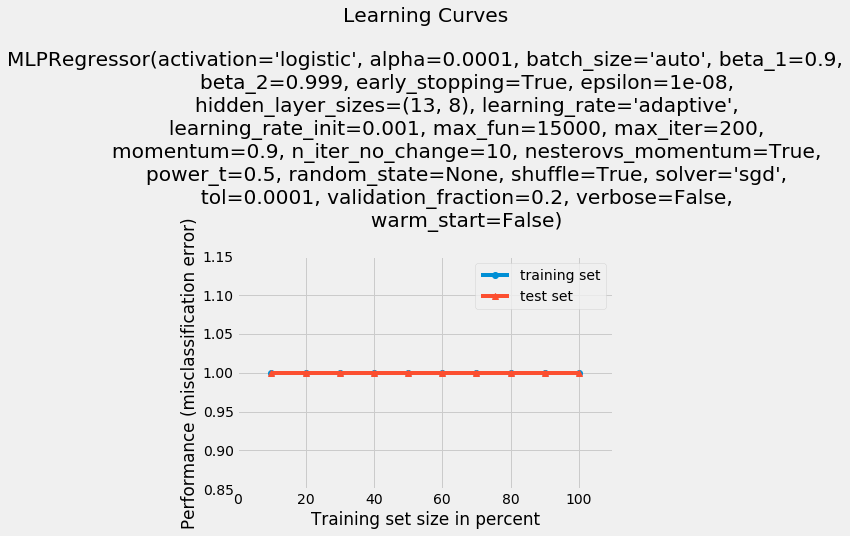

In [7]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.preprocessing import shuffle_arrays_unison

regr = MLPRegressor(hidden_layer_sizes=(13,8, ), activation='logistic', solver='sgd', alpha=0.0001, 
                    batch_size='auto', learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, 
                    max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                    momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.2, 
                    epsilon=1e-08, n_iter_no_change=10)

plot_learning_curves(train_data, train_output, test_data, test_output, regr)
plt.show()

In [6]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold


kf = KFold(n_splits=30)
list_training_error = []
list_testing_error = []

y = pd.DataFrame(data.Popularity)
X = pd.DataFrame(data.drop(['Popularity'], axis=1))

/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_netwo

/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


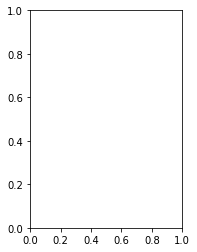

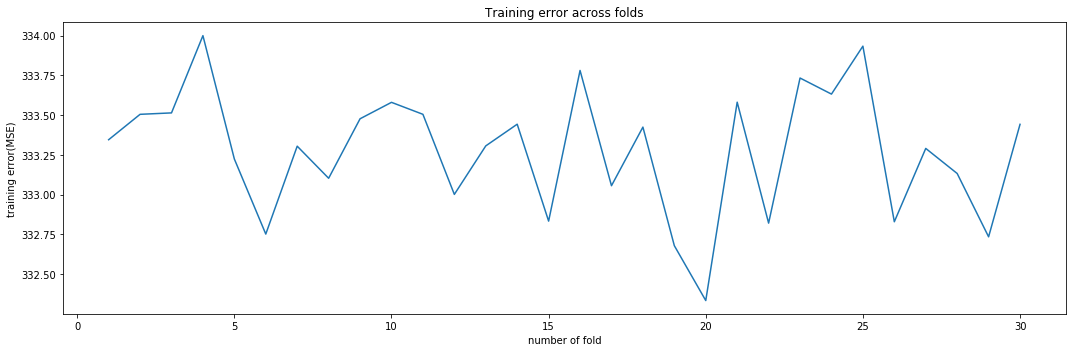

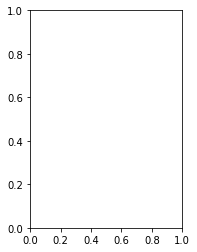

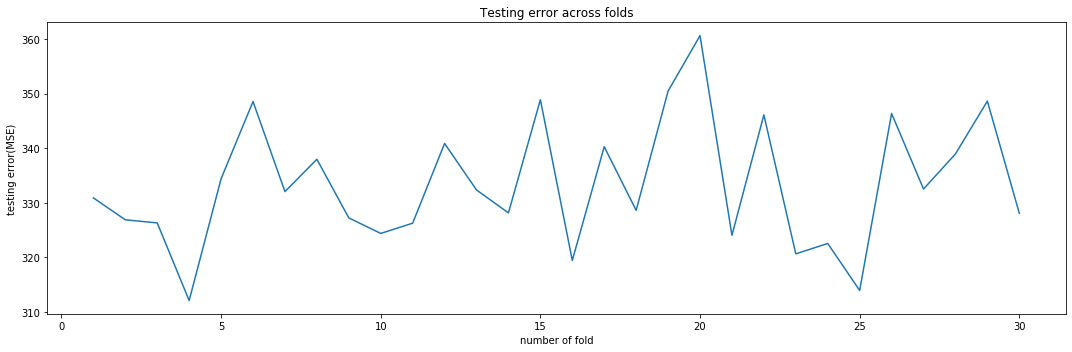

In [7]:
for train_index, test_index in kf.split(data):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    model = MLPRegressor(hidden_layer_sizes=(13,8, ), activation='logistic', solver='sgd', alpha=0.0001, 
                    batch_size='auto', learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, 
                    max_iter=80, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                    momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.2, 
                    epsilon=1e-08, n_iter_no_change=10)
    model.fit(X_train, y_train)
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test) 

    fold_training_error = mean_squared_error(y_train, y_train_data_pred)        
    fold_testing_error = mean_squared_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

plt.subplot(1,2,1)
plt.figure(figsize=(15,5))
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel())
plt.xlabel('number of fold')
plt.ylabel('training error(MSE)')
plt.title('Training error across folds')
plt.tight_layout()
plt.show()

plt.subplot(1,2,2)
plt.figure(figsize=(15,5))
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel())
plt.xlabel('number of fold')
plt.ylabel('testing error(MSE)')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

In [5]:
from sklearn import model_selection
from sklearn import metrics

y = pd.DataFrame(data.Popularity_bucket)
X = pd.DataFrame(data.drop(['Popularity_bucket'], axis=1))

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                        test_size=0.025, random_state=0)

print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

(61044, 14), (59517, 14), (1527, 14)


In [6]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Popularity_bucket
Release Date,1.000000,0.103879,0.061599,0.238364,0.019590,0.281013,-0.071993,0.107718,-0.251424,-0.004511,0.047575,-0.150728,0.039780,0.041083,0.107384
Popularity,0.103879,1.000000,0.128969,0.188155,0.017711,0.254367,-0.037723,0.019629,-0.241023,-0.125064,-0.093561,-0.001977,0.055279,0.073658,0.987241
Danceability,0.061599,0.128969,1.000000,0.109223,0.020462,0.137508,-0.037620,0.126564,-0.169025,-0.169604,-0.182748,0.537857,-0.083668,0.190941,0.128225
Energy,0.238364,0.188155,0.109223,1.000000,0.031102,0.783370,-0.072778,0.113236,-0.732720,-0.089406,0.195434,0.294942,0.244582,0.193918,0.183712
Key Val,0.019590,0.017711,0.020462,0.031102,1.000000,0.016093,-0.141655,0.026820,-0.030580,-0.005572,-0.004814,0.019748,0.000942,0.003033,0.017193
Loudness,0.281013,0.254367,0.137508,0.783370,0.016093,1.000000,-0.040539,-0.001510,-0.577576,-0.224861,0.074583,0.188688,0.193768,0.168116,0.248558
Mode,-0.071993,-0.037723,-0.037620,-0.072778,-0.141655,-0.040539,1.000000,-0.070894,0.079621,-0.049458,0.002233,0.032832,0.004728,-0.016991,-0.037285
Speechiness,0.107718,0.019629,0.126564,0.113236,0.026820,-0.001510,-0.070894,1.000000,-0.030448,-0.081231,0.185219,0.006461,0.013067,-0.009179,0.024217
Acousticness,-0.251424,-0.241023,-0.169025,-0.732720,-0.030580,-0.577576,0.079621,-0.030448,1.000000,0.094214,-0.057764,-0.188428,-0.203425,-0.174538,-0.236043
Instrumentalness,-0.004511,-0.125064,-0.169604,-0.089406,-0.005572,-0.224861,-0.049458,-0.081231,0.094214,1.000000,-0.018476,-0.147866,-0.026981,-0.028515,-0.119860


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2: 0.08648425610254519


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3: 0.07625816864422186


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4: 0.08601670400024639


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5: 0.08573124118129104


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6: 0.08529983467230294


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7: 0.10642984069164887


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8: 0.11384603354397434


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9: 0.08874087504595671


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10: 0.09542889811753309


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11: 0.07779975567539414


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12: 0.10730667672924177


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13: 0.2864823421642945


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14: 0.32565801853978793


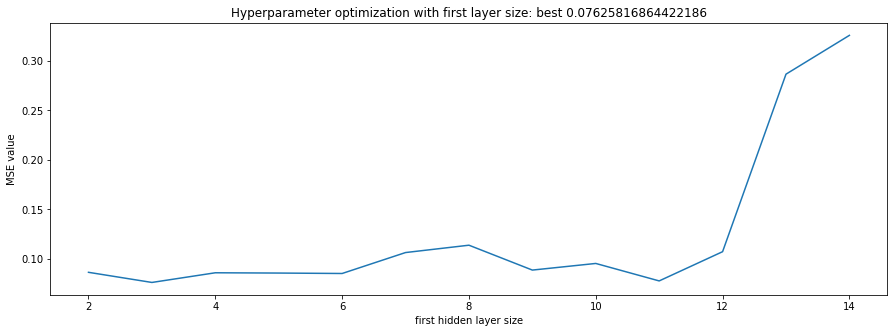

In [7]:
#validation through first sizes
sizes_list = []
scores_list = []

for sizes in range(2,15):
    reg = MLPRegressor(hidden_layer_sizes=(sizes, ))
    trained_reg = reg.fit(X_train, y_train)
    y_pred = trained_reg.predict(X_test)
    sizes_list.append(sizes)
    scores_list.append(metrics.mean_squared_error(y_test, y_pred))
    print('%s: %s' % (sizes, metrics.mean_squared_error(y_test, y_pred)))  
    

plt.figure(figsize=(15,5))
plt.xlabel('first hidden layer size')
plt.ylabel('MSE value')
plt.title('Hyperparameter optimization with first layer size: best {}'.format(min(scores_list)))
plt.plot(sizes_list, scores_list)

/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2: 0.09275411936760113


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3: 3.3235132050929352


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4: 0.08904908408759647


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5: 0.09403049193992567


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6: 3.3223585090997525


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7: 0.07590701398310812


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8: 0.09977743674066346


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9: 0.10335142392574535


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10: 0.08541969534215306


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11: 0.09801889178304558


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12: 0.10414999123769383


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13: 0.09017442046233455


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14: 0.10010467951138301


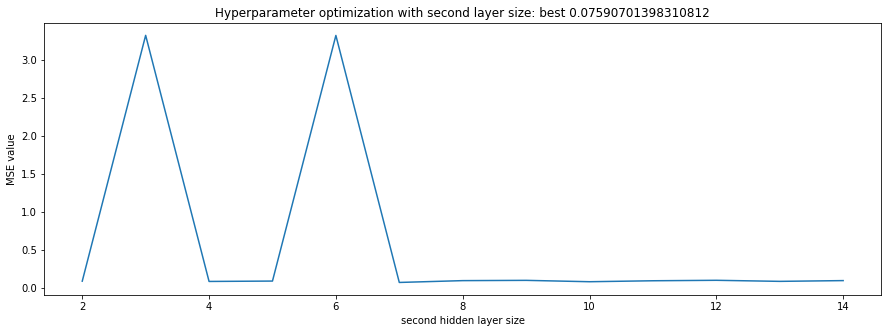

In [8]:
#validation through second sizes
sizes_list = []
scores_list = []

for sizes in range(2,15):
    reg = MLPRegressor(hidden_layer_sizes=(3,sizes, ))
    trained_reg = reg.fit(X_train, y_train)
    y_pred = trained_reg.predict(X_test)
    sizes_list.append(sizes)
    scores_list.append(metrics.mean_squared_error(y_test, y_pred))
    print('%s: %s' % (sizes, metrics.mean_squared_error(y_test, y_pred)))  
    

plt.figure(figsize=(15,5))
plt.xlabel('second hidden layer size')
plt.ylabel('MSE value')
plt.title('Hyperparameter optimization with second layer size: best {}'.format(min(scores_list)))
plt.plot(sizes_list, scores_list)

In [9]:
#validation through activation
sizes_list = []
scores_list = [] 

for activation in ['identity', 'logistic', 'tanh', 'relu']:
    reg = MLPRegressor(hidden_layer_sizes=(3,7, ),activation=activation)
    trained_reg = reg.fit(X_train, y_train)
    y_pred = trained_reg.predict(X_test)
    sizes_list.append(sizes)
    scores_list.append(metrics.mean_squared_error(y_test, y_pred))
    print('%s: %s' % (activation, metrics.mean_squared_error(y_test, y_pred)))  

/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


identity: 0.09521408183114549


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


logistic: 0.08811732033386857


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tanh: 3.321883151517324


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


relu: 0.0758320669225164


In [10]:
#validation through solvers
sizes_list = []
scores_list = []

for solver in ['lbfgs', 'sgd', 'adam']:
    reg = MLPRegressor(hidden_layer_sizes=(3,7, ), activation='relu', solver=solver)
    trained_reg = reg.fit(X_train, y_train)
    y_pred = trained_reg.predict(X_test)
    sizes_list.append(sizes)
    scores_list.append(metrics.mean_squared_error(y_test, y_pred))
    print('%s: %s' % (solver, metrics.mean_squared_error(y_test, y_pred)))  

/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


lbfgs: 3.322949034976798


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


sgd: 3.324266369780006
adam: 0.1002341721795586


In [11]:
#validation through lr
sizes_list = []
scores_list = []

for lr in ['constant', 'invscaling', 'adaptive']:
    reg = MLPRegressor(hidden_layer_sizes=(3,7, ), activation='relu', solver='adam', alpha=0.0001, 
                    batch_size='auto', learning_rate=lr)
    trained_reg = reg.fit(X_train, y_train)
    y_pred = trained_reg.predict(X_test)
    print('%s: %s' %
          (lr, metrics.mean_squared_error(y_test, y_pred))) 

/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


constant: 0.08083010444244107


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


invscaling: 0.08791888714183936


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


adaptive: 0.07832227624792677


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40: 0.21143287805440886


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (41) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


41: 0.11587863571640857


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


42: 0.09805709339068452


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (43) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


43: 0.08831010173768333


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (44) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


44: 0.0978443038436838
45: 0.07619779095535441


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (46) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


46: 0.10055488696356317
47: 3.4975395377741907


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (48) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


48: 0.08577147757539308


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (49) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


49: 0.08589655265567901


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50: 3.2693486018220734
51: 0.08538652786381226


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (52) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


52: 0.0843079307515021
53: 0.08607035523945591


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


54: 0.07570821361255754


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (55) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


55: 1.9743415534986413


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (56) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


56: 0.0886652677727505
57: 0.07593464402848525


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (58) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


58: 0.08656456376012216
59: 0.08612580005087561


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


60: 0.0878103641023359


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (61) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


61: 0.09953409676219574
62: 0.07565759456721


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


63: 0.09150969452817351


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


64: 0.08511568073502035


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


65: 3.323464971974316


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


66: 0.07747958675690247


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


67: 0.08467743879056099


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


68: 3.324953032938131


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (69) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


69: 0.08550298246976332


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


70: 0.08755768149593895
71: 3.3240858170702756


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (72) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


72: 0.08287882340513916
73: 0.07661754735225171


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


74: 0.0866534122731295


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


75: 3.325687868401969


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


76: 0.08614865858002577


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


77: 3.2712117867257824


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


78: 0.09014777404693534


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


79: 0.08484002495756733


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


80: 3.3199494946923687


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


81: 0.06732514924561775


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


82: 0.08502920043307


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (83) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


83: 0.08649075014007963
84: 0.08590458162972868


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


85: 0.08478213471419735


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


86: 3.3243776497969617


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


87: 0.06895303345757199


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (88) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


88: 0.07580369389135329
89: 3.262871180338801


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


90: 0.09517410534244533
91: 0.08517763823342454


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


92: 0.07570261492787017


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


93: 0.07902662126753204


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


94: 0.08511126730177561


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


95: 0.0902167110970074


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


96: 0.08466702476886101


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


97: 3.322442789075652


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


98: 3.322477394697491


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


99: 0.07578043057998318


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100: 0.06884265831120812


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


101: 0.06771949189784664


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


102: 0.08221136805016481


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


103: 0.08530329154506895


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


104: 0.08603453725070259


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


105: 0.08589581709123977


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


106: 0.07564476948308889


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


107: 0.060285143619922946


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


108: 0.08790655775355193


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


109: 0.08530462735414357


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


110: 0.07583575667276436


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


111: 0.09039901028532638


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


112: 0.089366444067126


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


113: 0.07520622750761626


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


114: 0.07589602341068685


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


115: 0.07568996836362081


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


116: 0.08603231595160944


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


117: 0.07579419195444378


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


118: 0.08588173818021586


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


119: 0.08533661590232382


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


120: 0.07784446843516742


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


121: 0.08839241758209321


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


122: 0.06525371212379039


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


123: 0.08624856148623174


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


124: 0.08499430105769488


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


125: 3.351721179027757


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


126: 0.08560939374438781


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


127: 0.0761056962264561


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


128: 0.08194141791059031


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


129: 0.08670342784678221


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


130: 0.08539111357290446


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


131: 0.07606331850224572


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


132: 0.08641643349275824


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


133: 0.09300515336923595


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


134: 0.08538112544624013


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


135: 0.07529916183915633


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


136: 0.08598367900700939


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


137: 0.07571034082855574


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


138: 0.07621618335191536


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


139: 3.3224663619198496


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


140: 0.0759064875637772


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


141: 0.08516038267813857


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


142: 0.07610107707572046


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


143: 0.08514830624123874


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


144: 0.08468513164880387


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


145: 0.08810271058142248


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


146: 0.09100273552550517


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


147: 0.08671540517973476


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


148: 0.07569217434255927


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


149: 0.08519226727421363


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


150: 0.08486767996420294


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


151: 0.06729201698699308


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


152: 0.07549463484494416


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


153: 0.08495934048392574


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


154: 0.08540331802148995


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


155: 0.08503308960465251


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


156: 0.0755510262852363


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


157: 0.08628021663449276


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


158: 0.07580966133479973


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


159: 3.322205968329108


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


160: 0.07555573298661349


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


161: 0.06076853550693753


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


162: 0.06767989337762621


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


163: 0.07905898222403487


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


164: 0.08502409231696272


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


165: 0.07607958855281796


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


166: 0.08758695641178915


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


167: 0.0875147512098985


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


168: 0.08521904555790509


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


169: 0.0851099671763426


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


170: 0.08488164961845965


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


171: 3.323321473234725


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


172: 0.08709607986855347


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


173: 0.07610201843950484


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


174: 3.3228217320353055


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


175: 0.08546689313811776


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


176: 0.08558844131821194


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


177: 0.0797794423817954


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


178: 0.07586442878176083


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


179: 0.07572810378957112


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


180: 0.07577997377711278


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


181: 3.3235245739998303


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


182: 0.07578375631103994


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


183: 0.08483630148188881


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


184: 3.3222778038086873


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


185: 0.08512276091589231


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


186: 3.3206509588150057


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


187: 0.08518060480668999


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


188: 3.324445712624436


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


189: 0.08553492165848985


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


190: 0.08535767257678813


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


191: 0.07550314308727399


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


192: 0.08722800125507085


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


193: 0.08545561637273878


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


194: 0.07563637039806027


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


195: 0.08726368772724737


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


196: 0.07578813532597305


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


197: 0.07597947555213733


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


198: 0.08612569966841693


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


199: 0.07883283559731515


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


200: 0.08818821189700694


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


201: 0.0755818713581182


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


202: 3.3233633010959744


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


203: 0.08468393033001478


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


204: 0.08489715560225354


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


205: 0.07613713967174669


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


206: 0.085344071640993


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


207: 0.0851416735937247


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


208: 0.08641870463185922


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


209: 0.08475296517571144


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


210: 0.086551074388529


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


211: 0.08543729782222463


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


212: 0.08805999927883597


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


213: 0.08719124079721913


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


214: 0.07539702926876306


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


215: 0.08519907473455478


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


216: 0.08717731238030284


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


217: 0.06822161675908724


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


218: 0.07625136781970822


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


219: 0.07576830268693156


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


220: 0.08480572955740724


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


221: 0.07572899353165896


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


222: 0.08530688562899748


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


223: 0.0851397598820886


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


224: 0.08548664668278654


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


225: 0.0872597296665382


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


226: 0.08592797060211747


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


227: 0.08656044167181418


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


228: 0.08489079644557312


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


229: 0.07602422443184806


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


230: 0.08516485569046711


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


231: 0.0763215849318305


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


232: 0.08694464936735738


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


233: 3.322675291288003


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


234: 0.07944807253511203


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


235: 0.07502004912936322


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


236: 0.08545460158798251


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


237: 0.07595680181086659


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


238: 0.08483851935270642


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


239: 0.08520050521294767


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


240: 0.08538032424933943


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


241: 0.08690093781235589


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


242: 0.08740063664998418


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


243: 0.07606688650899773


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


244: 0.08639512604643253


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


245: 0.08495028359749514


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


246: 0.08358981932785213


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


247: 3.3228494322094897


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


248: 0.0852386513798225


/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


249: 0.08845478366696521


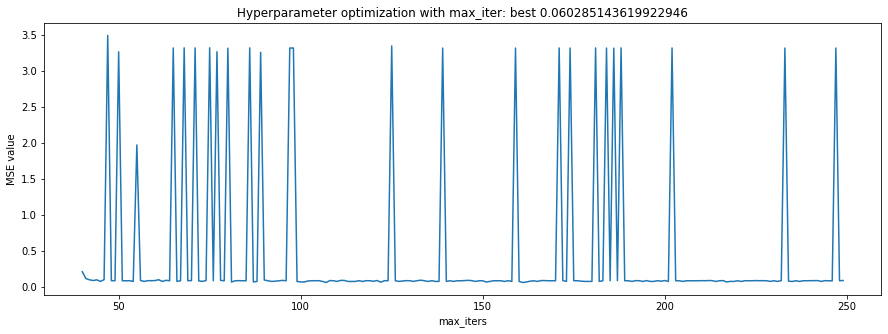

In [12]:
#validation through iterations
iters_list = []
scores_list = []
for iters in range(40,250):
    reg = MLPRegressor(hidden_layer_sizes=(3,7, ), activation='relu', solver='adam', alpha=0.0001, 
                    batch_size='auto', learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, 
                    max_iter=iters, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False,
                    early_stopping=True, validation_fraction=0.2, 
                    epsilon=1e-08, n_iter_no_change=10)
    trained_reg = reg.fit(X_train, y_train)
    y_pred = trained_reg.predict(X_test)
    iters_list.append(iters)
    scores_list.append(metrics.mean_squared_error(y_test, y_pred))
    print('%s: %s' %
          (iters, metrics.mean_squared_error(y_test, y_pred))) 

plt.figure(figsize=(15,5))
plt.xlabel('max_iters')
plt.ylabel('MSE value')
plt.title('Hyperparameter optimization with max_iter: best {}'.format(min(scores_list)))
plt.plot(iters_list, scores_list)

In [13]:
reg = MLPRegressor(hidden_layer_sizes=(3,7, ), activation='relu', solver='adam', alpha=0.0001, 
                    batch_size='auto', learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, 
                    max_iter=107, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False,
                    early_stopping=True, validation_fraction=0.2, 
                    epsilon=1e-08, n_iter_no_change=10)
trained_reg = reg.fit(X_train, y_train)
y_pred = trained_reg.predict(X_test)

print(metrics.mean_squared_error(y_test, y_pred))

/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.07555272548557534


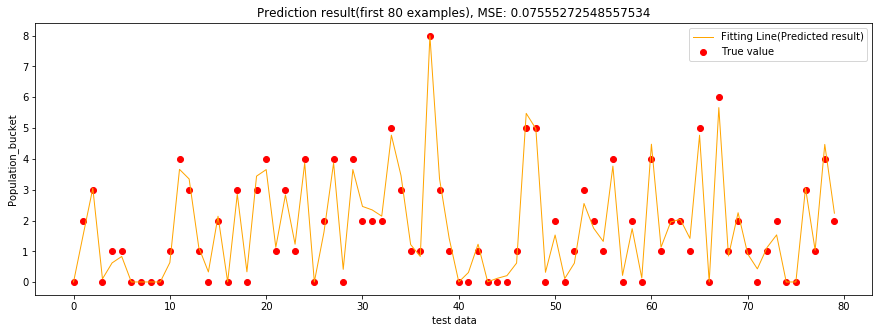

In [28]:
xx=range(0,len(y_test[:80]))
plt.figure(figsize=(15,5))
plt.xlabel('test data')
plt.ylabel('Population_bucket')
plt.title('Prediction result(first 80 examples), MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
plt.scatter(xx,y_test[:80],color="red",label="True value",linewidth=1) 
plt.plot(xx,y_pred[:80],color="orange",label="Fitting Line(Predicted result)",linewidth=1)
plt.legend()
plt.show()

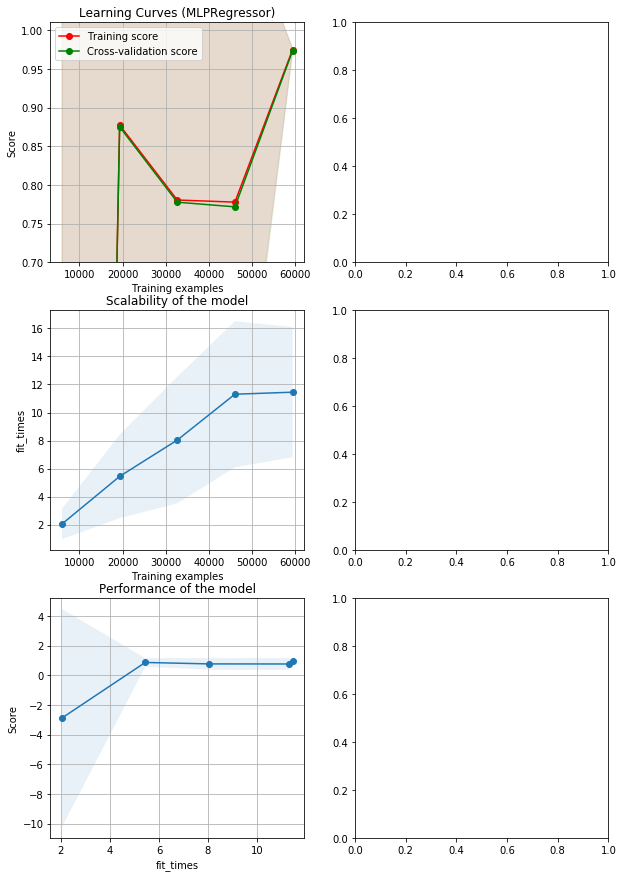

In [27]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (MLPRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.002, random_state=0)

estimator =reg

plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

#title = "Learning Curves (MLPRegressor)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=100, test_size=0.002, random_state=0)
#estimator = MLPRegressor()
#plot_learning_curve(estimator, title, train_data, train_output, axes=axes[:, 1], ylim=(0.7, 1.01),
#                    cv=cv, n_jobs=4)

plt.show()